# Tarea 1
### Ejercicio 2

## Jonathan Alexis Urrutia Anguiano       41401102-5

In [4]:
from pylab import*
from time import*
%matplotlib inline
%run "Integradores_a_utilizar.ipynb"

Se resolverá la ecuación siguiente con las condiciones iniciales  $\ddot y(1) = 1\, , \dot y(1) = 2\, , y(1) = 1$:
$$ \dddot y + \ddot y^2-3 \dot y^3+\cos^2(y) = e^{-t}\sin(3t)$$
Pasándolo a un sistema de tres ecuaciones diferenciales lineales y de primer orden con 
\begin{align} u_1 &=y, \\ u_2 &=\dot y,\\ u_3 &= \ddot y, \end{align}
se debe resolver 
\begin{align}\dot u_1 &=u_2, \\ \dot u_2 &= u_3,\\ \dot u_3 &= e^{-t}\sin(3t)-\cos^2(u_1)+3  u_2^3 - u_3^2\end{align}

además la derivada respecto al tiempo y el jacbiano son los siguientes
\begin{align}
\frac{d\vec u}{dt} =\left(\begin{array}{c} 0\\0\\ e^{-t}(-\sin(3t)+3\cos(3t))  \end{array}\right) 
\;\;\; \mathbb{J} = \left(\begin{array}{c c c} 0 & 1 &0\\0&0&1\\ -\sin(2u_1)&9u_2^2&-2u_3   \end{array}\right) 
\end{align}

In [5]:
def ecDif(y,t):
    return array([y[1],y[2],exp(-t)*sin(3*t)-(cos(y[0]))**2+3*(y[1]**3)-(y[2])**2])
def d_ecDif(y,t):
    return array([0,0,exp(-t)*(-sin(3*t)+3*cos(3*t))]), array([[0,1,0],[0,0,1],[-sin(2*y[0]),9*(y[1]**2),-2*y[2]]])  

Se propondrán distintos valores de $h$, más chicos que los dador por default en los métodos utilizados, y se graficarán. Dado que se econtró que la solución diverge en $t=2$, se procederá a resolver la ecuación en el intervalo de tiempo $[1,1.96]$. Se tomará ala mejor h aquella que de una solución en el intervalo deseado y que sea la $h$ más grande de ellas puesto que eso significa que se necesitarán menos pasos. Este procedimiento será usado para todos los métodos. 

Mediante prueba y error se econtro que para $h\leq 0.5E-5$ con el método de Euler se lograba obtener la sol de la ecuación. Se prosiguió a comparar si con valores menores de $h$ la solución cambiaba

In [52]:
h=[.5e-5,1.e-6,.5e-6,1.e-7,.5e-7]
print h

[5e-06, 1e-06, 5e-07, 1e-07, 5e-08]


### Método de Euler

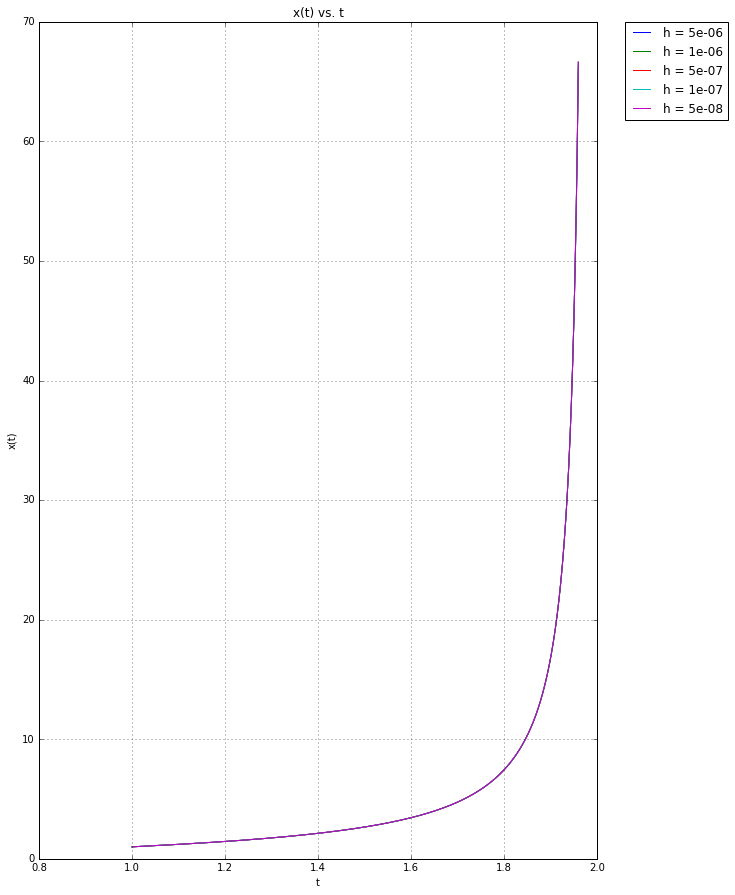

In [37]:
fig, ax = plt.subplots(figsize=(10,15))
for i in xrange(len(h)):
    t, solE = euler(ecDif,[1,2,1],[1,1.96],0,h[i])
    plot(t, solE[:,0],label='h = %s' %(h[i]))

grid(True)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
title('x(t) vs. t'),xlabel('t'),ylabel('x(t)')
show()

### Comparación de los métodos

Dado qu no parewce haber diferencias significativas ahora sólo se verá si los métodos con errores menores pueden funcionar con valores más grandes de $h$.

Al realizar este procedimiento se observó que no era posible utilizar pasos menores que el que usa Euler, por lo que se optó por usar el mismo paso pero se compararon las soluciones dadas por cada método.

Se observo que para este paso, todas las soluciones son la misma.

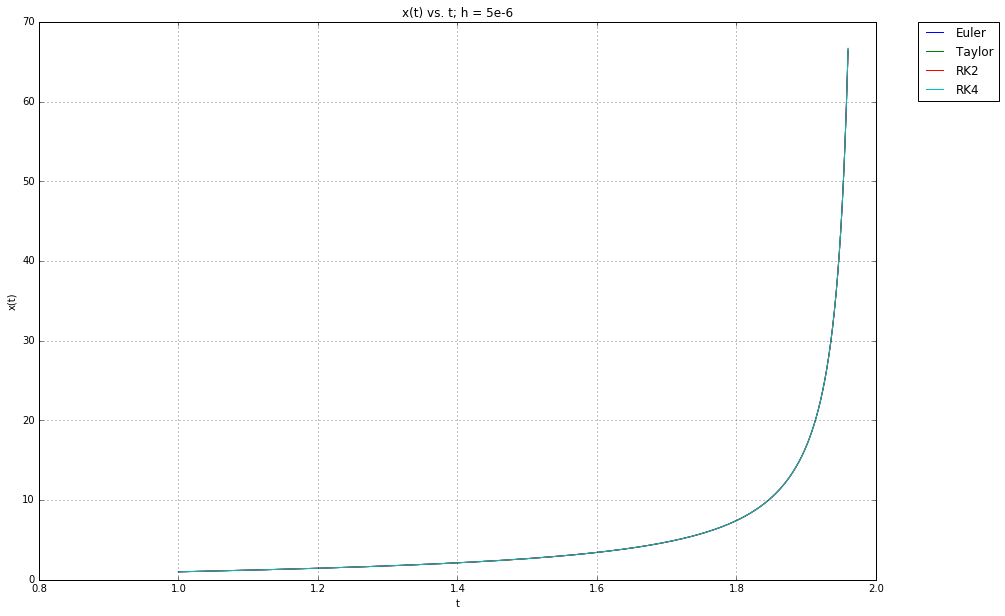

In [53]:
tE, solE = euler(ecDif,[1,2,1],[1,1.96],0,h[0])
tT, solT = taylor2(ecDif,d_ecDif,[1,2,1],[1,1.96],0,h[0])
tRK2, solRK2 = rk2(ecDif,[1,2,1],[1,1.96],0,h[0])
tRK4, solRK4 = rk4(ecDif,[1,2,1],[1,1.96],0,h[0])

fig, ax = plt.subplots(figsize=(15,10))

plot(tE, solE[:,0],label='Euler')
plot(tT, solT[:,0],label='Taylor')
plot(tRK2, solRK2[:,0],label='RK2')
plot(tRK4, solRK4[:,0],label='RK4')

grid(True)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
title('x(t) vs. t; h = 5e-6'),xlabel('t'),ylabel('x(t)')
show()